# Lab 2 Report:
## Iris Classification with Regression

### Name:

In [ ]:
# Import neccessary packages

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import torch

In [ ]:
from IPython.display import Image # For displaying images in colab jupyter cell

In [ ]:
Image('lab2_exercise1.PNG', width = 1000)

FileNotFoundError: No such file or directory: 'lab2_exercise1.PNG'

FileNotFoundError: No such file or directory: 'lab2_exercise1.PNG'

<IPython.core.display.Image object>

## Prepare Data

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# iris dataset is available from scikit-learn package
iris = load_iris()

# Load the X (features) and y (targets) for training
X_train = iris['data']
y_train = iris['target']

# Load the name labels for features and targets
feature_names = iris['feature_names']
names = iris['target_names']

# Feel free to perform additional data processing here (e.g. standard scaling)
#X_mean = np.mean(X_train, axis=0)
#X_std = np.std(X_train, axis=0)
#X_train = (X_train - X_mean) / X_std
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


In [ ]:
# Print the first 10 training samples for both features and targets

print(X_train[:10, :], y_train[:10])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]] [0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Print the dimensions of features and targets

print(X_train.shape, y_train.shape)

(150, 4) (150,)


In [ ]:
# feature_names contains name for each column in X_train
# For targets, 0 -> setosa, 1 -> versicolor, 2 -> virginica

print(feature_names, names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


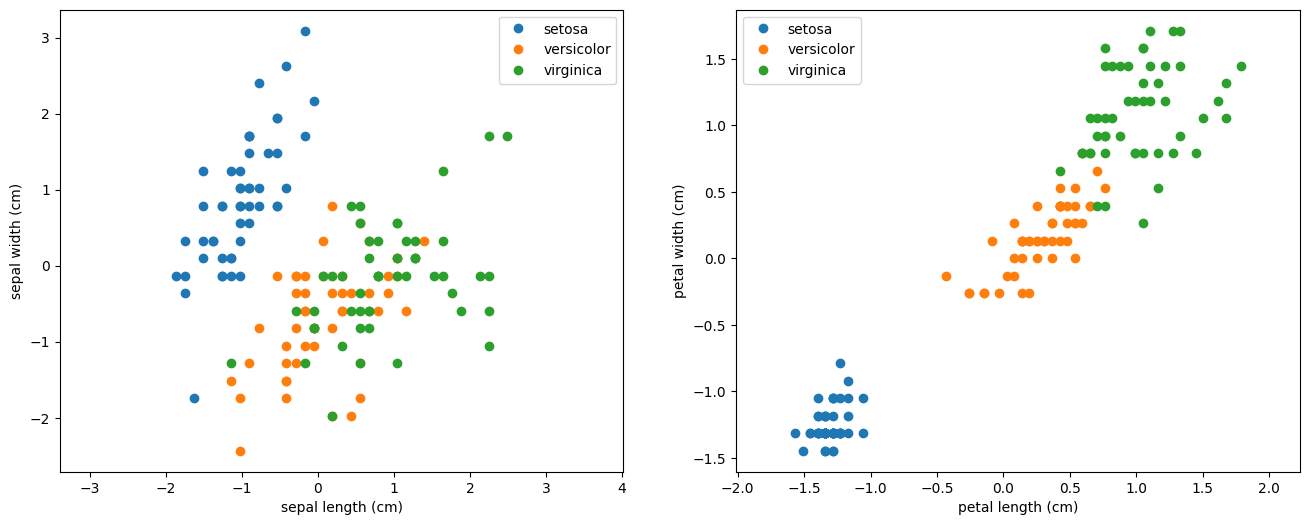

In [ ]:
# We can visualize the dataset before training

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# enumerate picks up both the index (0, 1, 2) and the element ('setosa', 'versicolor', 'virginica') from "names"
# loop 1: target = 0, target_name = 'setosa'
# loop 2: target = 1, target_name = 'versicolor' etc

for target, target_name in enumerate(names):

    # Subset the rows of X_train that fall into each flower category using boolean mapping
    X_plot = X_train[y_train == target]

    # Plot the sepal length versus sepal width for the flower category
    ax1.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)

# Label the plot
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend()

# Repeat the above process but with petal length versus petal width
for target, target_name in enumerate(names):

    X_plot = X_train[y_train == target]

    ax2.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)

ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend()

## Define Model

In [ ]:
class irisClassification(torch.nn.Module):

    def __init__(self, input_dim, output_dim):

        super(irisClassification, self).__init__()

        self.layer1 = torch.nn.Linear(input_dim, 10)
        self.layer2 = torch.nn.Linear(10, output_dim)

    def forward(self, x):

        out = self.layer2(self.layer1(x))
        #x = torch.nn.functional.relu(self.layer1(x))
        #out = self.layer2(x)

        return out

## Define Hyperparameters

In [ ]:
model = irisClassification(input_dim=4, output_dim=1)

learning_rate = 0.03
epochs  = 49

# We will use gradient descent for our optimizer and Mean Squared Error Loss function
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

## Identify Tracked Values

In [ ]:
# follow models performance over each epoch. Identify a metric and track it over epochs

losses = []
accuracies = []

## Train Model

In [ ]:
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()

for epoch in range(epochs):

  y_pred = model(X_train)
  loss = loss_func(y_pred, y_train.view(-1, 1))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  losses.append(loss.item())


## Visualize and Evaluate Model

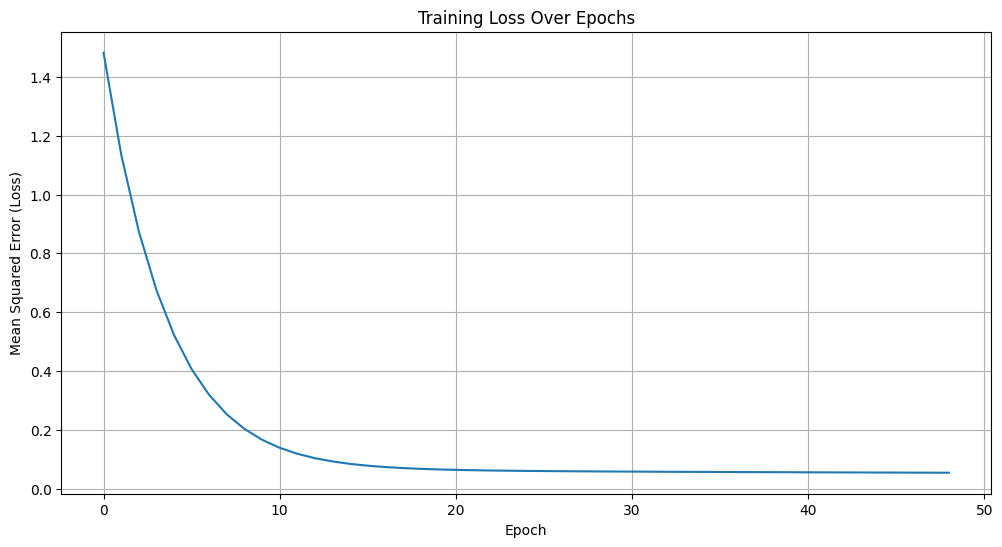

In [ ]:
# Plot your training loss throughout the training
# Include proper x and y labels for the plot

plt.figure(figsize=(12, 6))

plt.plot(range(epochs), losses,)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (Loss)")
plt.grid(True)
plt.show()

In [ ]:
# Confirm that your model's training accuracy is >90%

with torch.no_grad():

    # Compare your model predictions with targets (y_train) to compute the training accuracy
    y_pred = model(X_train)
    y_pred_classes = torch.round(y_pred).int().view(-1)
    y_true_classes = y_train.int().view(-1)

# Training accuracy = (# of correct predictions) / (total # of training samples)
# You can round the model predictions to integer (e.g. 0.34 -> 0, 1.78 -> 2)

    correct = (y_pred_classes == y_true_classes).sum().item()
    total = y_true_classes.size(0)
    accuracy = correct / total * 100

print(f"Training Accuracy: {accuracy:}%")


Training Accuracy: 96.66666666666667%
